In [80]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
food_consumption = pd.read_csv("E:/Data Scientist/5. Introduction to Statistics in Python/food_consumption.csv")
amir_deals = pd.read_csv("E:/Data Scientist/5. Introduction to Statistics in Python/amir_deals.csv")
restaurant_groups = pd.read_csv("E:/Data Scientist/5. Introduction to Statistics in Python/restaurant_groups.csv")
world_happiness = pd.read_csv("E:/Data Scientist/5. Introduction to Statistics in Python/world_happiness.csv")

In [3]:
food_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [4]:
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

In [5]:
print(np.mean(usa_consumption['consumption']))

44.650000000000006


In [6]:
print(np.median(usa_consumption['consumption']))

14.58


In [7]:
rice_consumption = food_consumption[food_consumption['food_category']=='rice']
rice_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
8,9,Argentina,rice,8.77,11.22
19,20,Australia,rice,11.03,14.12
30,31,Albania,rice,7.78,9.96
41,42,Iceland,rice,3.89,4.98
52,53,New Zealand,rice,9.16,11.72


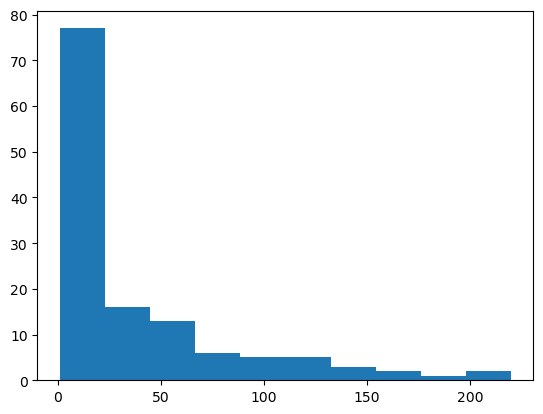

In [8]:
plt.hist(rice_consumption['co2_emission'])
plt.show()

In [10]:
print(rice_consumption['co2_emission'].agg(["mean","median"]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [11]:
print(food_consumption.groupby('food_category')['co2_emission'].agg(["var","std"]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


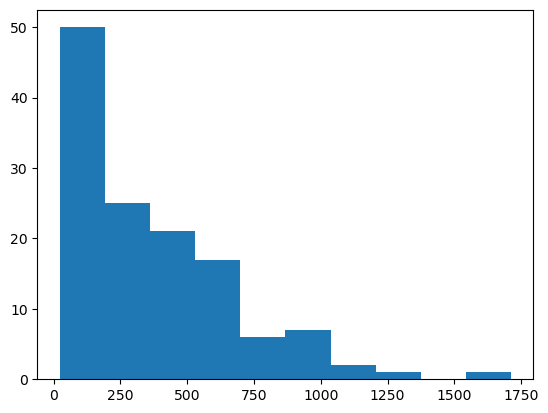

In [12]:
plt.hist(food_consumption[food_consumption['food_category']=='beef']['co2_emission'])
plt.show()

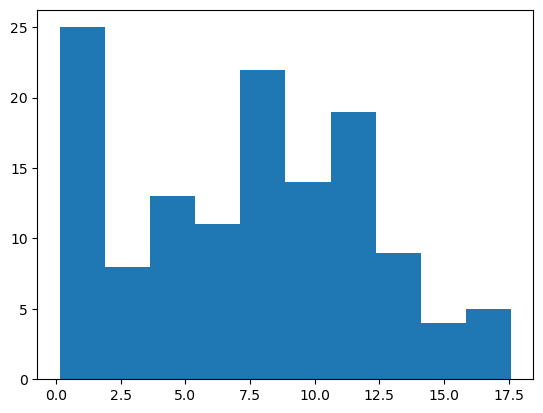

In [13]:
plt.hist(food_consumption[food_consumption['food_category']=='eggs']['co2_emission'])
plt.show()

In [14]:
print(np.quantile(food_consumption['co2_emission'],[0,0.25,0.5,0.75,1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [16]:
print(np.quantile(food_consumption['co2_emission'],[0,0.2,0.4,0.6,0.8,1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [17]:
print(np.quantile(food_consumption['co2_emission'],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


In [18]:
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [19]:
q1 = np.quantile(emissions_by_country,0.25)
q3 = np.quantile(emissions_by_country,0.75)
iqr = q3 - q1

In [20]:
lower_outlier = q1 - 1.5 * iqr
upper_outlier = q3 + 1.5 * iqr

In [22]:
outliers = emissions_by_country[(emissions_by_country > upper_outlier) | (emissions_by_country < lower_outlier)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [24]:
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [25]:
counts = amir_deals['product'].value_counts()
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


In [27]:
print(amir_deals['product'].count())

178


In [26]:
probs = counts / amir_deals['product'].count()
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


In [28]:
np.random.seed(24)
sample_without_replacement = amir_deals.sample(5,replace=False)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [29]:
np.random.seed(24)

sample_with_replacement = amir_deals.sample(5,replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


In [31]:
restaurant_groups

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


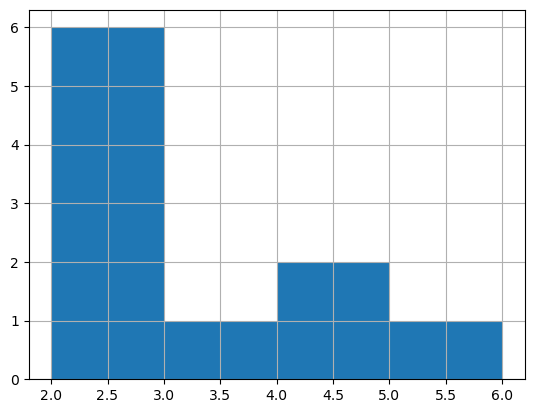

In [32]:
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

In [34]:
print(restaurant_groups['group_size'].value_counts())

group_size
2    6
4    2
6    1
3    1
Name: count, dtype: int64


In [35]:
print(restaurant_groups['group_size'].count())

10


In [33]:
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups['group_size'].count()
size_dist

group_size
2    0.6
4    0.2
6    0.1
3    0.1
Name: count, dtype: float64

In [36]:
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1


In [37]:
print(restaurant_groups['group_size'].value_counts())

group_size
2    6
4    2
6    1
3    1
Name: count, dtype: int64


In [38]:
print(restaurant_groups.shape[0])

10


In [40]:
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
size_dist

group_size
2    0.6
4    0.2
6    0.1
3    0.1
Name: count, dtype: float64

In [41]:
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

In [42]:
expected_value = (size_dist.group_size * size_dist.prob).sum()
print(expected_value)

2.9000000000000004


In [43]:
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

prob_4_or_more = groups_4_or_more.prob.sum()
print(prob_4_or_more)

0.30000000000000004


In [44]:
min_time = 0
max_time = 30

from scipy.stats import uniform

prob_less_than_5 = uniform.cdf(5,min_time,max_time)
print(prob_less_than_5)

0.16666666666666666


In [45]:
prob_greater_than_5 = 1 - uniform.cdf(5,min_time,max_time)
print(prob_greater_than_5)

0.8333333333333334


In [46]:
prob_between_10_and_20 = uniform.cdf(20,min_time,max_time) - uniform.cdf(10,min_time,max_time)

print(prob_between_10_and_20)

0.3333333333333333


In [47]:
np.random.seed(334)

from scipy.stats import uniform

wait_times = uniform.rvs(0,30,size=1000)

print(wait_times)

[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629 24.68695356 18.27160808
 22.85829011  0.12929581 15.67789664  2.3262095  15.79151771 21.90473557
 18.25817257 15.78657023 28.74328434  9.38971275 17.0010565   0.95433991
 15.96917606  2.16395679  8.903302   19.24982156  6.52414731 14.10185677
 27.86973455 14.38121016 28.59233824 13.17550521 22.96382405  2.52904371
  6.2163781   8.40217036  4.48079914 28.16365298 19.73302715  3.63959282
  1.74002295  1.5324219  26.97096908 29.37490861  4.71379092  6.44990488
  6.81999564 22.81302458 12.41563042 11.14591581  8.08043184 29.60574053
  3.24571518 19.66709277 13.38939302 29.56433707 24.84697258  6.249684
 15.07668579  5.27474477 27.27430815  2.42084219 27.88317515  0.81231424
  3.48564273 19.80738592  6.11128124 19.10323692  9.12156821 28.31696467
 20.80158047 17.0840986  26.59969632 28.38502685 20.75398728 11.73610958
 20.55950389 18.20349931  4.68857179 17.67638417 29.9

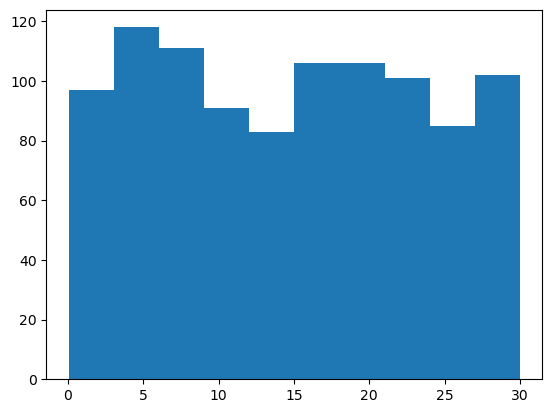

In [48]:
plt.hist(wait_times)
plt.show()

In [49]:
from scipy.stats import binom

np.random.seed(10)

print(binom.rvs(1, 0.3, size=1))

[1]


In [50]:
print(binom.rvs(3, 0.3, size=1))

[0]


In [51]:
from scipy.stats import binom

np.random.seed(10)

deals = binom.rvs(3, 0.3, size=52)

print(np.mean(deals))

0.8269230769230769


In [52]:
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

0.026999999999999996


In [53]:
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

0.784


In [54]:
prob_greater_than_1 = 1 - binom.cdf(1,3,0.3)

print(prob_greater_than_1)

0.21599999999999997


In [55]:
won_30pct = 3 * 0.3
print(won_30pct)

0.8999999999999999


In [56]:
won_25pct = 3 * 0.25
print(won_25pct)

0.75


In [57]:
won_35pct = 3 * 0.35
print(won_35pct)

1.0499999999999998


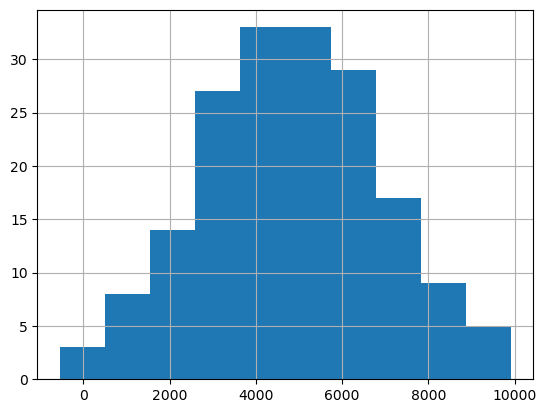

In [58]:
amir_deals['amount'].hist(bins=10)
plt.show()

In [60]:
from scipy.stats import norm

prob_less_7500 = norm.cdf(7500,5000,2000)

print(prob_less_7500)

0.8943502263331446


In [61]:
prob_over_1000 = 1 - norm.cdf(1000,5000,2000)

print(prob_over_1000)

0.9772498680518208


In [62]:
prob_3000_to_7000 = norm.cdf(7000,5000,2000) - norm.cdf(3000,5000,2000)

print(prob_3000_to_7000)

0.6826894921370859


In [63]:
pct_25 = norm.ppf(0.25,5000,2000)

print(pct_25)

3651.0204996078364


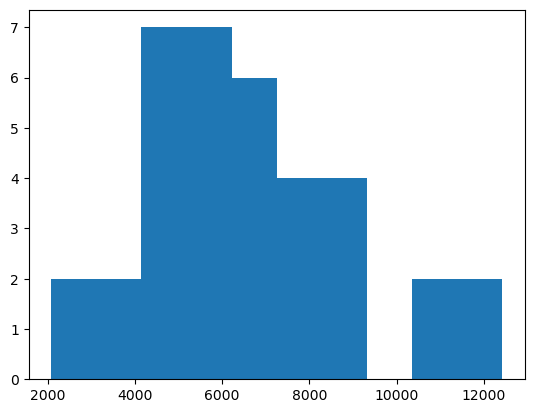

In [64]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000*1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean,new_sd,size = 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

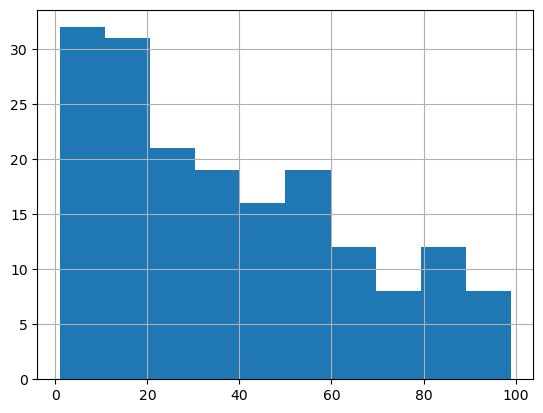

In [65]:
amir_deals['num_users'].hist()
plt.show()

In [66]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20,replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

32.0


In [67]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals and take mean
samp_20 = amir_deals['num_users'].sample(20, replace=True)
np.mean(samp_20)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean )
  
print(sample_means)

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


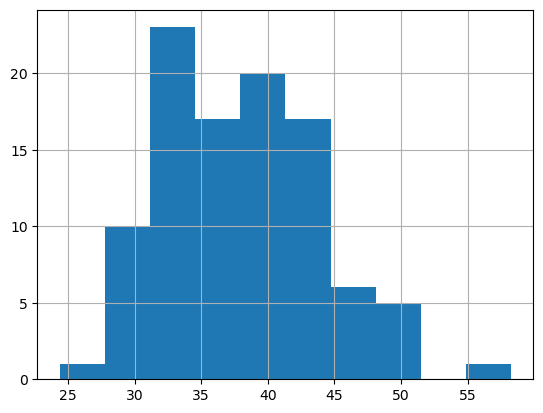

In [68]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [70]:
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

0.1562934518505317


In [71]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5,5.5)

print(prob_coworker)

0.17140068409793663


In [72]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2,4)

print(prob_2_or_less)

0.23810330555354436


In [73]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10,4)

print(prob_over_10)

0.0028397661205137315


In [74]:
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


In [75]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

0.20189651799465536


In [76]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684


In [78]:
world_happiness.head()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


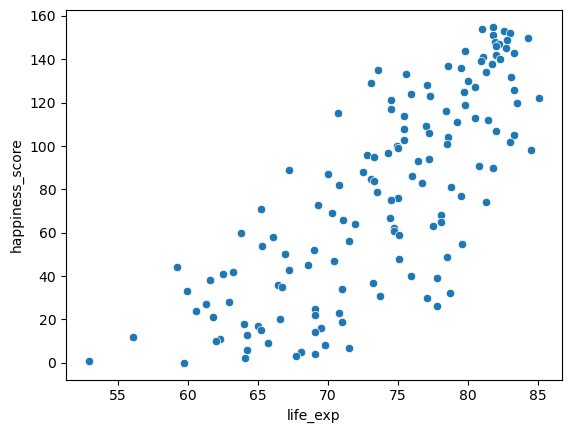

In [81]:
sns.scatterplot(y='happiness_score',x='life_exp',data=world_happiness)

plt.show()

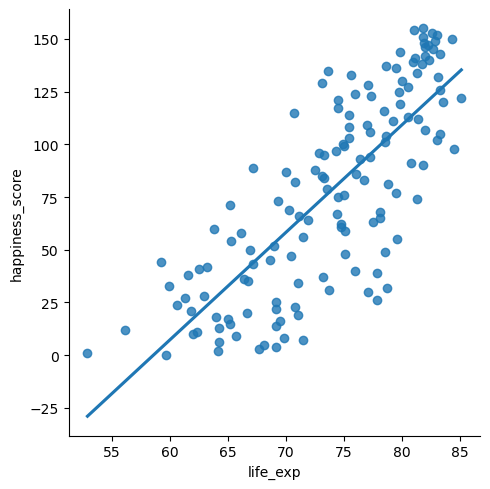

In [82]:
sns.lmplot(y='happiness_score',x='life_exp',data=world_happiness, ci= None)
plt.show()

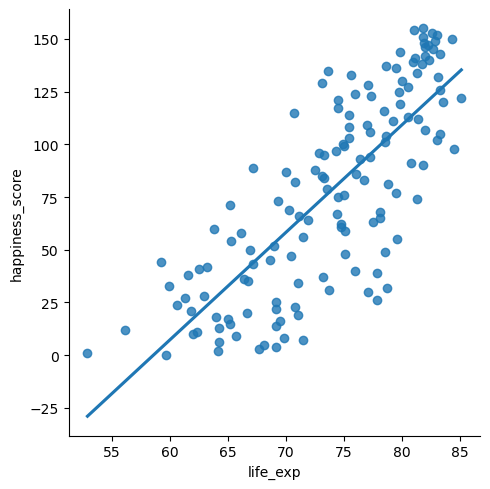

0.7802249053272062


In [83]:
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])
print(cor)

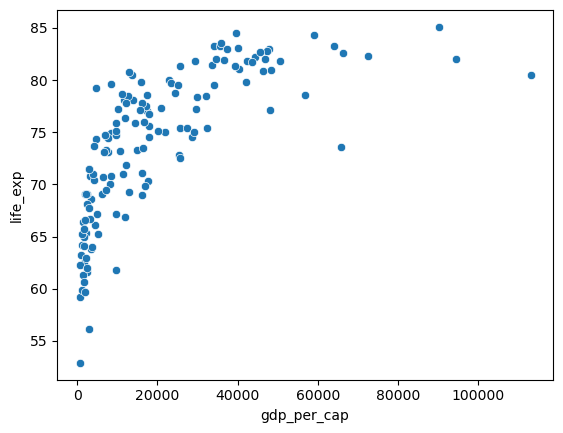

In [84]:
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)
plt.show()

In [85]:
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])
print(cor)

0.7019547642148012


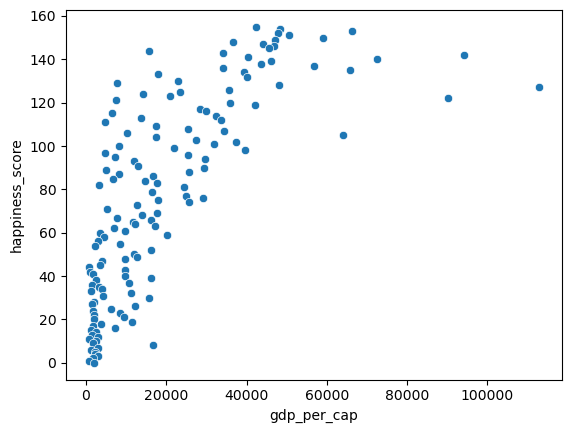

0.727973301222298


In [87]:
sns.scatterplot(y='happiness_score',x='gdp_per_cap',data=world_happiness)
plt.show()

cor = world_happiness['happiness_score'].corr(world_happiness['gdp_per_cap'])
print(cor)

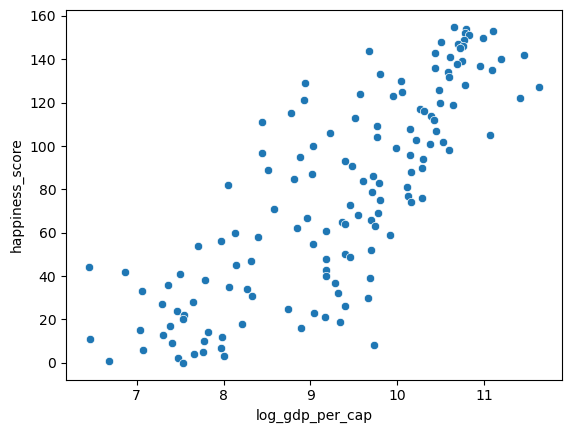

0.8043146004918288


In [88]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap',y='happiness_score',data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

In [89]:
# Scatterplot of grams_sugar_per_day and happiness_score
sns.scatterplot(x='grams_sugar_per_day',y='happiness_score', data=world_happiness)
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor = world_happiness['grams_sugar_per_day'].corr(world_happiness['happiness_score'])
print(cor)

ValueError: Could not interpret value `grams_sugar_per_day` for parameter `x`